C:\Users\Piyush\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Piyush\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


        Month  Forecasted_Sales      Lower_CI       Upper_CI
0  2025-02-01      56195.466105  48290.783135   64100.149074
1  2025-03-01      66076.675040  56597.110048   75556.240032
2  2025-04-01      50890.593031  39025.059043   62756.127019
3  2025-05-01      59511.081534  46312.788654   72709.374414
4  2025-06-01      59514.625730  44692.037035   74337.214425
5  2025-07-01      68663.510565  52650.929619   84676.091510
6  2025-08-01      67568.976990  50269.141976   84868.812005
7  2025-09-01      70456.561179  52079.747308   88833.375050
8  2025-10-01      71338.596694  51863.430111   90813.763277
9  2025-11-01      69630.095503  49170.416251   90089.774754
10 2025-12-01      67666.537085  46230.178229   89102.895940
11 2026-01-01      67812.118969  45467.287109   90156.950829
12 2026-02-01      65183.770633  40226.023773   90141.517493
13 2026-03-01      74085.544166  47392.560468  100778.527864
14 2026-04-01      60312.873783  31576.405343   89049.342224
15 2026-05-01      68011

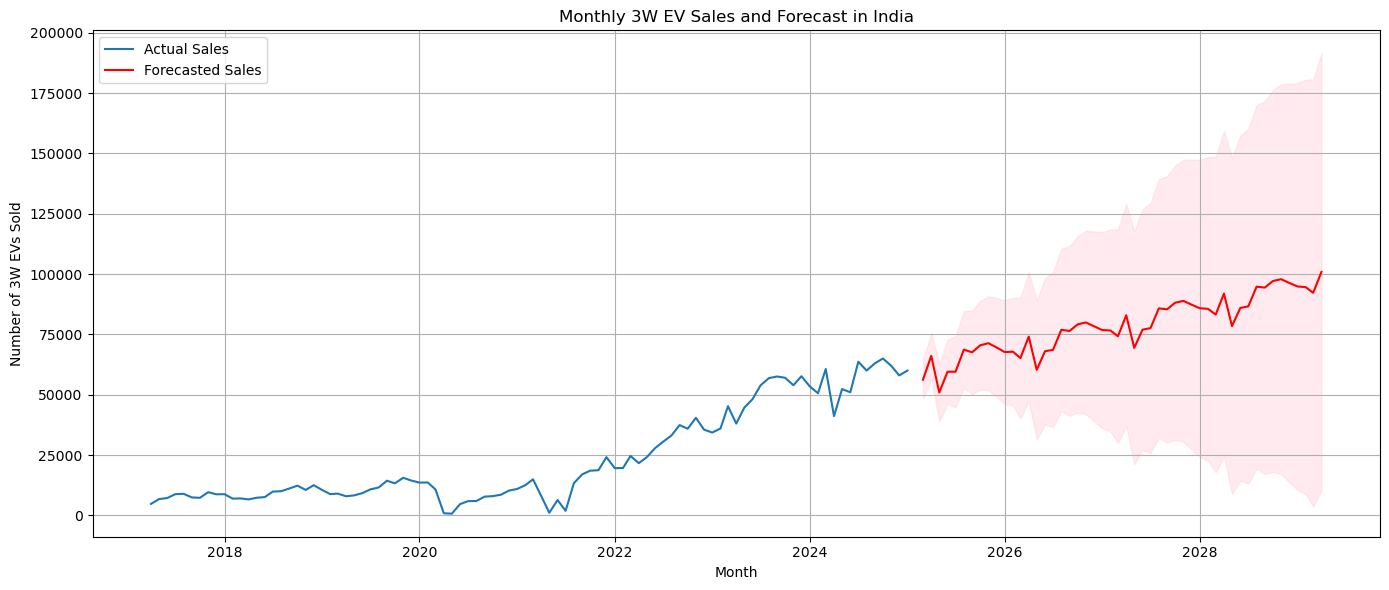

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load data from Excel
file_path = 'Ev Sales.xlsx'
df = pd.read_excel(file_path, usecols=[0, 2])  # Assuming column 0 = Month, column 2 = 3W

# Clean column names
df.columns = ['Month', 'EV_Sales']

# Remove commas and convert to integer
df['EV_Sales'] = df['EV_Sales'].astype(str).str.replace(',', '').astype(int)

# Convert Month to datetime
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
df.set_index('Month', inplace=True)

# Fit SARIMA model — using seasonal_order with period=12 (monthly seasonality)
sarima_model = SARIMAX(df['EV_Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit(disp=False)

# Forecast next 12 months (or adjust steps)
forecast_steps = 50
forecast = sarima_result.get_forecast(steps=forecast_steps)

# Forecast index starts after the last known month
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='ME')

# Extract forecast values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Create forecast DataFrame
# Display forecast table
forecast_df = pd.DataFrame({
    'Month': forecast_values.index,
    'Forecasted_Sales': forecast_values.values,
    'Lower_CI': forecast_conf_int.iloc[:, 0].values,
    'Upper_CI': forecast_conf_int.iloc[:, 1].values
})
print(forecast_df)

# Plot actual vs forecasted
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['EV_Sales'], label='Actual Sales')
plt.plot(forecast_index, forecast_values, label='Forecasted Sales', color='red')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Monthly 3W EV Sales and Forecast in India')
plt.xlabel('Month')
plt.ylabel('Number of 3W EVs Sold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
